# LOGISTIC REGRESSION - COMPLAINTS CLASSIFIER

**Goal:** route complaints to the proper researched team based on product groupings.

The business unit receives complaintsin the form of free text and wants to route the complaints to the wants to route the complaints to one of seven different depaertments (product_group name in the daata parenthesis:.

1. Bank account or service (bank_servie)
2. Credit card (credit_card)
3. Credit reporting (credict_reporting)
4. Debt collection (debt_collection)
5. Lines of loans (loan)
6. Mortgage (mortgange)

We have obtained a data set wiith 286,362 records that contains complaint text (text), a message identifier (complaint_id) and a verified correct complaint department product_group).


In [1]:
#Standard packages
import pandas as pd
import numpy as np
import matplotlib

#Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Plotting
from matplotlib import pyplot as plt
import seaborn as sns
# Allow plots in Notebook
%matplotlib inline

In [2]:
# Import and inspect the data
df = pd.read_csv(r"D:\\Documents\\Data\\scra_complaint_data.csv", encoding = 'ANSI')
df = df[['product','text','company']]
df.head()

,product,text,company
0,Checking account,a check was cashed and remained good until aft...,JPMORGAN CHASE CO.
1,Checking account,a criminal used a bank of america account to s...,BANK OF AMERICA NATIONAL ASSOCIATION
2,Checking account,a merchant submitted an ach 2 12 weeks after t...,JPMORGAN CHASE CO.
3,Checking account,a person deposited my check in suntrust bank i...,SUNTRUST BANKS INC.
4,Checking account,a stop payment was requested for funds being t...,E*TRADE BANK


In [3]:
# Define the dependent and independent variables
X = df['text']
y = df['product']

In [4]:
# Define the train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
X_train.head()

1847     on wells fargo withdrew 5500 00 from checking ...
6653     amount due is zero rental apartment lease was ...
17764    in i applied for mortgage refinancing under th...
16239    first of all we hav e us b ank for our mortgag...
5975     the payment system and deceptive billing pract...
Name: text, dtype: object

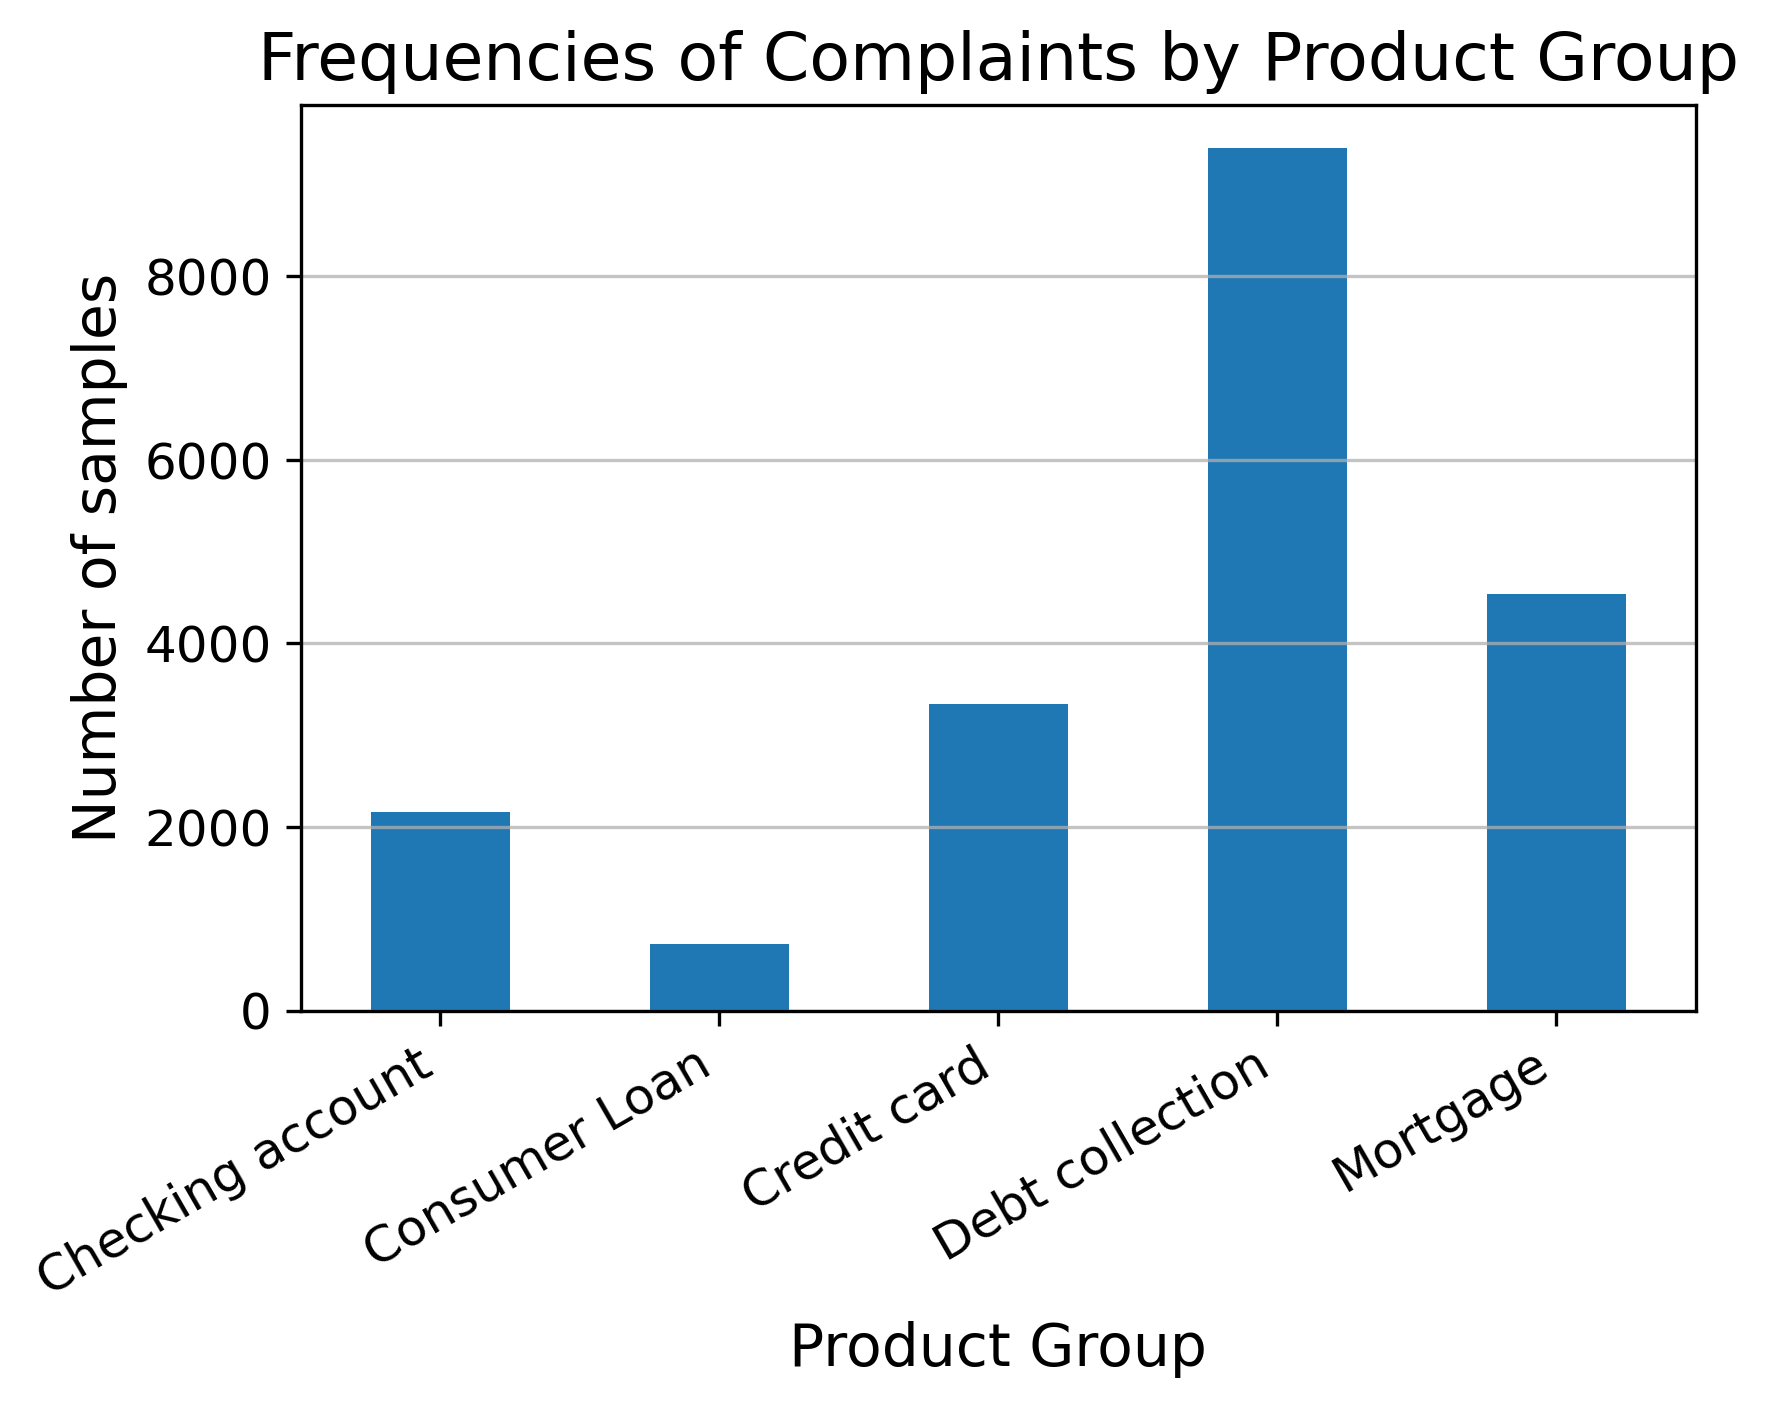

In [28]:
plt.figure(figsize = [6,4], dpi =300)
df.groupby('product').text.count().plot.bar(ylim = 0)
plt.grid(axis = 'y', alpha = 0.75)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Number of samples', fontsize = 14)
plt.xlabel('Product Group', fontsize = 14)
plt.title('Frequencies of Complaints by Product Group', fontsize = 16)
plt.xticks(rotation = 30, ha = 'right', fontsize = 12)
plt.savefig('01_bank_bar.png', figsize = (6,4), dpi = 300, bbox_inches = 'tight')
plt.show()

In [5]:
# Define the vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf= TfidfVectorizer()
vectorizer = CountVectorizer()

In [6]:
# Get features and labels
features = Tfidf.fit_transform(X_train) #CORRECT TRANSFORM
labels = y_train #CORRECT LABEL

In [7]:
# Convert product categories to numeric and numeric to categories
df = df[pd.notnull(df['product'])]
df.columns = ['product','text','company']
df['category_id'] = df['product'].factorize()[0]
# Convert to numeric
category_id_df = df[['product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
# Convert to categorical
id_to_category = dict(category_id_df[['category_id', 'product']].values)
df.head()

,product,text,company,category_id
0,Checking account,a check was cashed and remained good until aft...,JPMORGAN CHASE CO.,0
1,Checking account,a criminal used a bank of america account to s...,BANK OF AMERICA NATIONAL ASSOCIATION,0
2,Checking account,a merchant submitted an ach 2 12 weeks after t...,JPMORGAN CHASE CO.,0
3,Checking account,a person deposited my check in suntrust bank i...,SUNTRUST BANKS INC.,0
4,Checking account,a stop payment was requested for funds being t...,E*TRADE BANK,0


In [8]:
#vectorizer = TfidfVectorizer()
bow_transformer=vectorizer.fit(X_train)
#bow_transformer_test=vectorizer.fit(X_test)

text_bow_train=bow_transformer.transform(X_train)#ONLY TRAINING DATA
text_bow_test=bow_transformer.transform(X_test)#ONLY TEST DATA

## Classifier Comparison

In [9]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn import metrics

### Define Classifiers

In [10]:
# Load and define classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    #LinearSVC(),
    MultinomialNB(),
    #SGDClassifier(),
    RidgeClassifier(tol=1e-2, solver="sag", max_iter=300),
    Perceptron(max_iter=25),
    KNeighborsClassifier(n_neighbors=10),
    LogisticRegression(random_state=0, solver='lbfgs', max_iter=200, multi_class='auto')
]

### Execute the comparison Classifiers

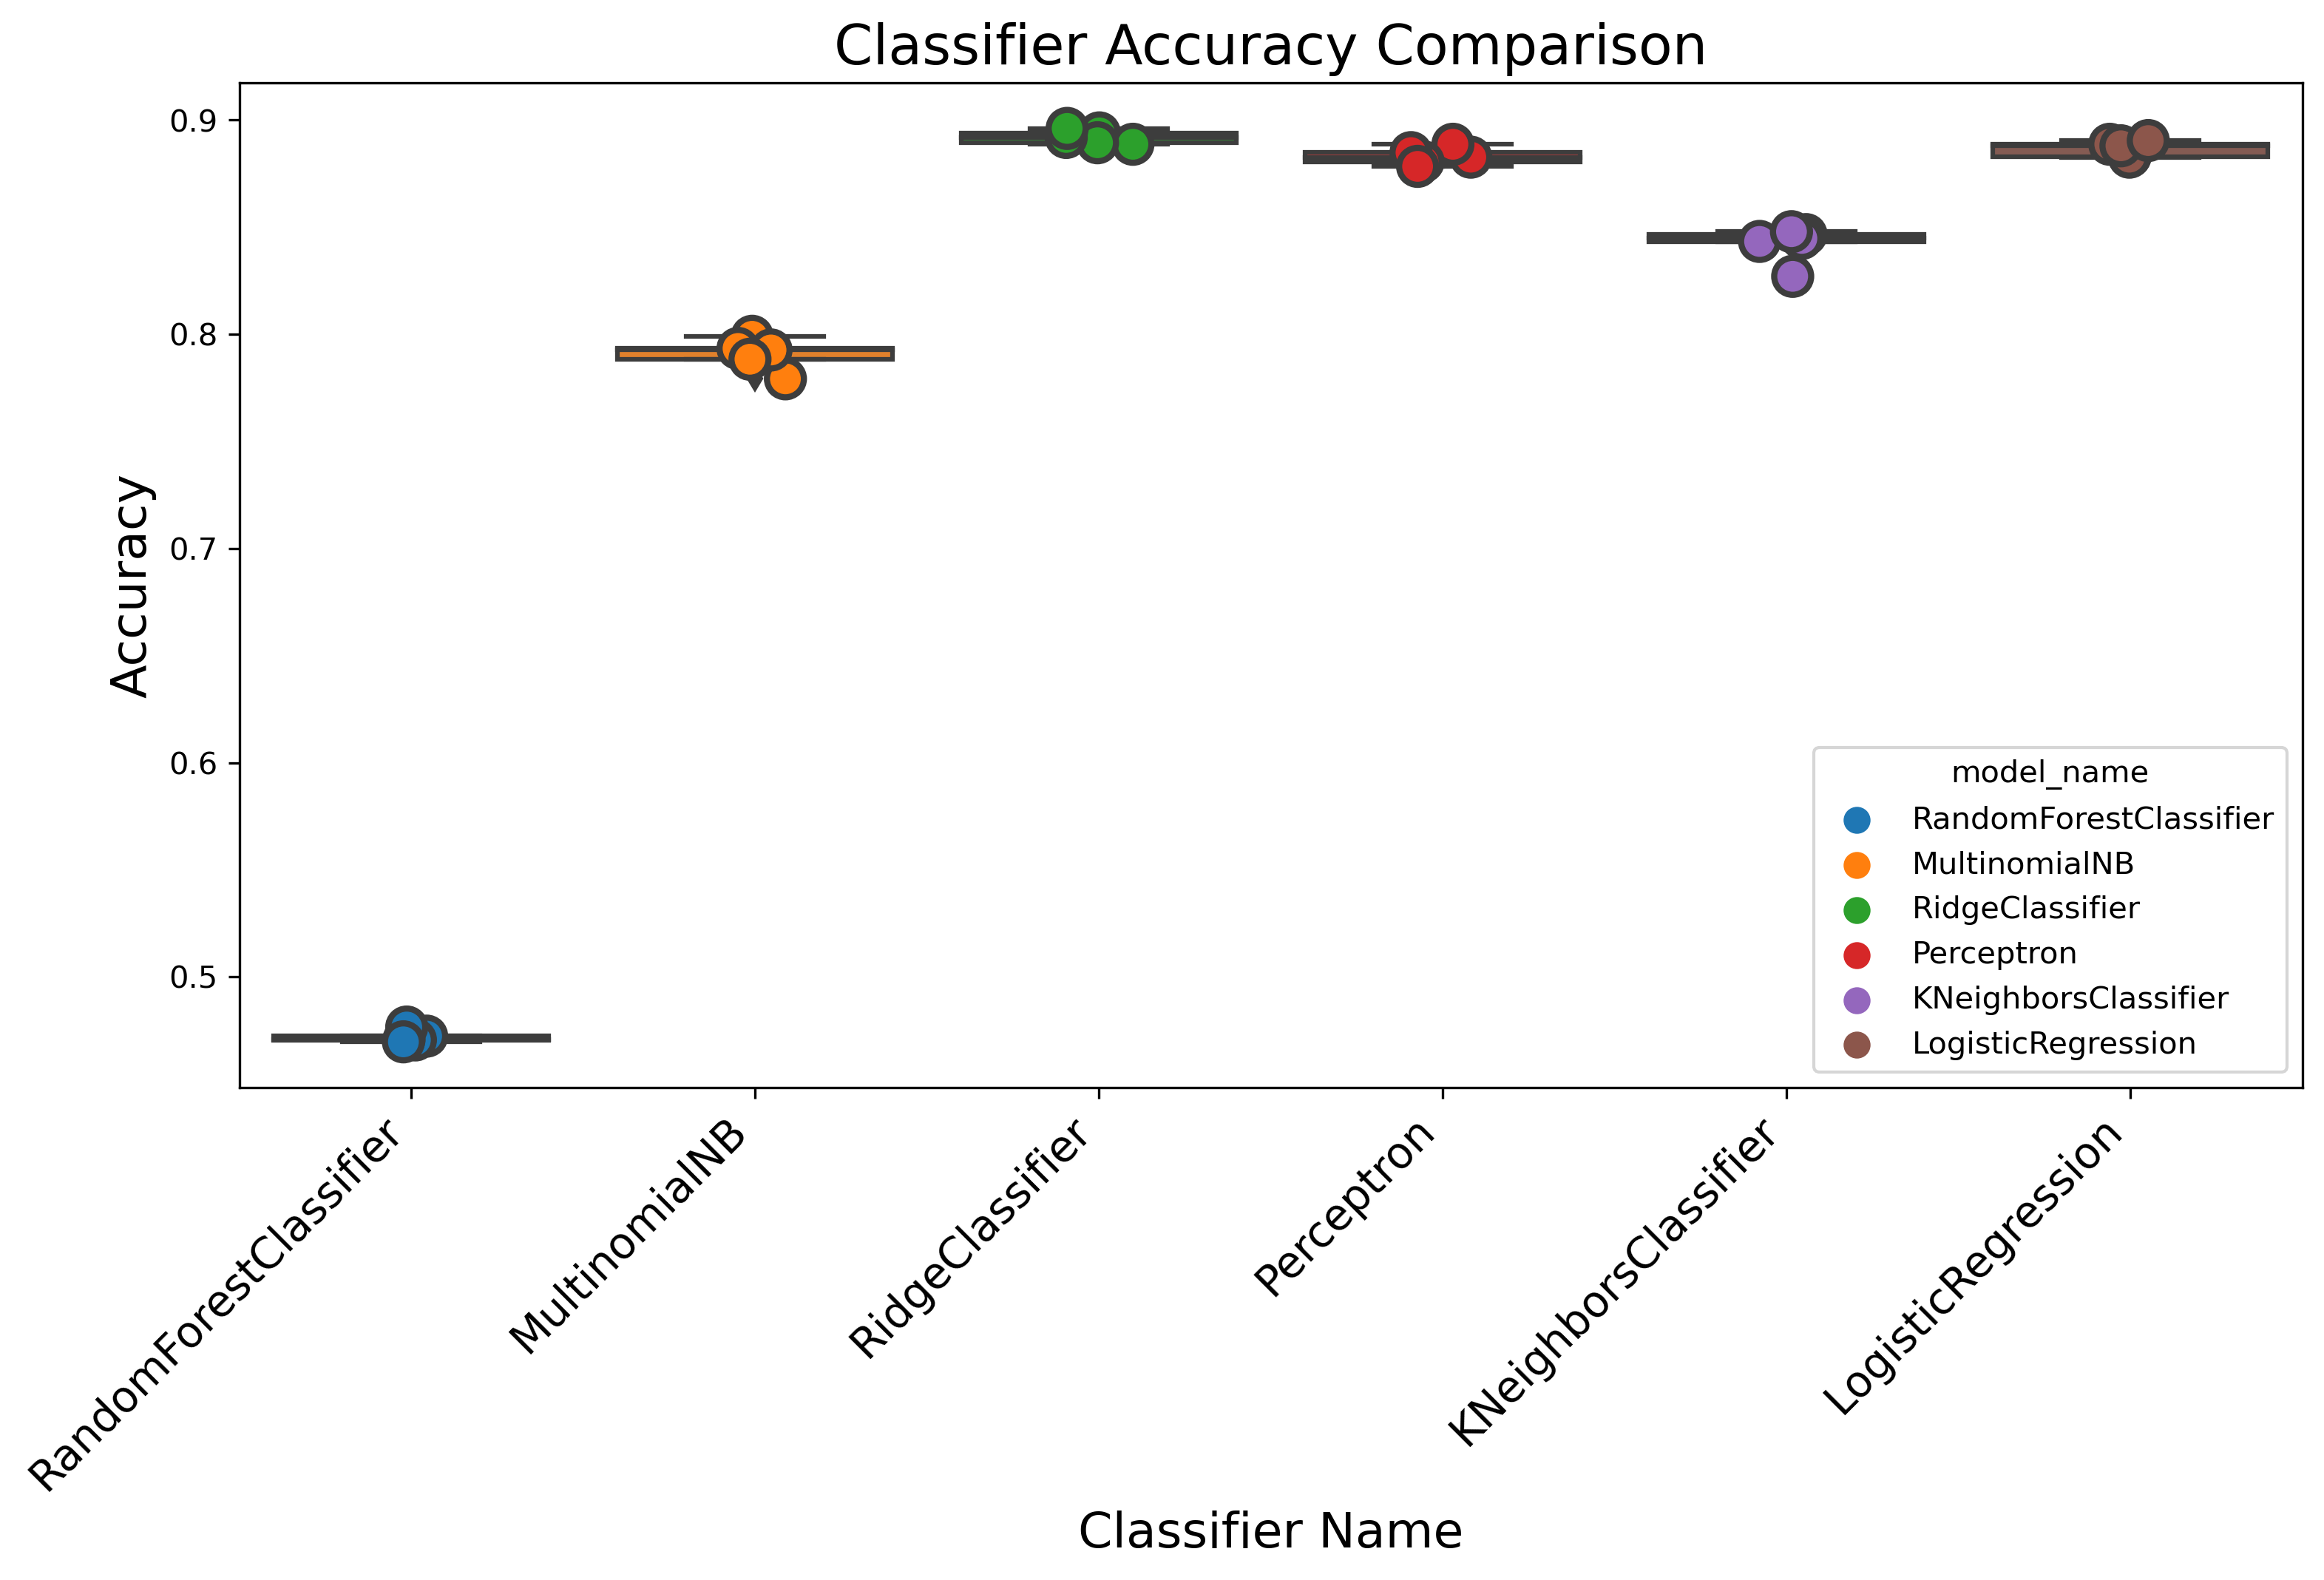

In [31]:
# Code chuck to run each model and their comparisons
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
plt.figure(figsize = [12,6], dpi = 300)
sns.boxplot(x = 'model_name', y = 'accuracy', data = cv_df)
sns.stripplot(x = 'model_name', y = 'accuracy', data = cv_df, hue = 'model_name',
              size = 12, jitter = True, edgecolor = "gray", linewidth = 2)
plt.title('Classifier Accuracy Comparison', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 16)
plt.xlabel('Classifier Name', fontsize = 16)
plt.xticks(fontsize = 14)
plt.xticks(rotation = 45, ha = 'right', fontsize = 14)
plt.savefig('01_bank_comp.png', figsize = (6,4), dpi = 300, bbox_inches = 'tight')
plt.show()

### Anlysis of Model Performance

In [12]:
# Calculate model accuracies
cv_df.groupby('model_name').accuracy.mean()

model_name
KNeighborsClassifier      0.793465
LogisticRegression        0.880715
MultinomialNB             0.629811
Perceptron                0.859735
RandomForestClassifier    0.476575
RidgeClassifier           0.881353
Name: accuracy, dtype: float64

### BOW Analysis with a Multinomial Logiostic Regression (MLR)

In [13]:
from sklearn.neural_network import MLPClassifier
log_clf = LogisticRegression(random_state=0, max_iter=200)
log_clf.fit(text_bow_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=0)

In [14]:
# Score the training model
log_score = log_clf.score(text_bow_train, y_train)
log_score

0.9948259975901906

In [15]:
# Get predictions and score them
y_pred = log_clf.predict(text_bow_test)
y_pred_score = log_clf.score(text_bow_test,y_test)
y_pred_score

0.8604497354497355

## Confusion Matrices

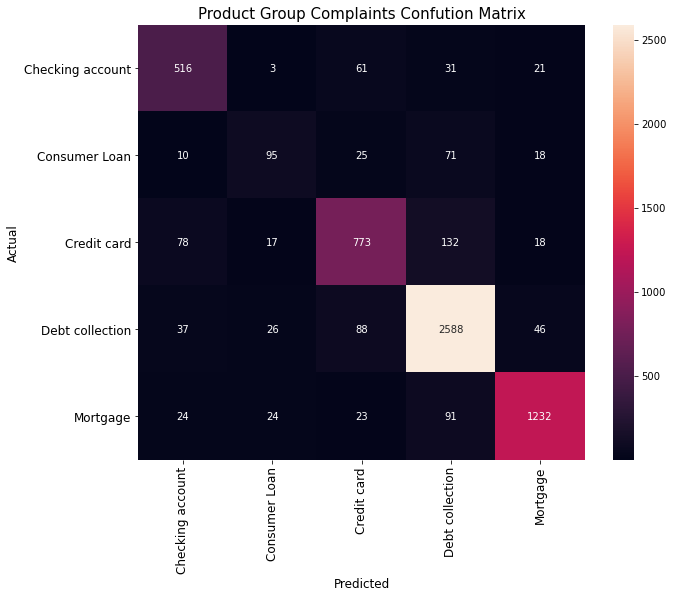

In [16]:
# Genreate the heatmap representation of the confusion matix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.heatmap(conf_mat, annot=True, fmt='d', 
            xticklabels=category_id_df.values[0:7,0], 
            yticklabels=category_id_df.values[0:7,0])
plt.title('Product Group Complaints Confution Matrix', fontsize = 15)
plt.ylabel('Actual', fontsize = 12)
plt.xlabel('Predicted', fontsize = 12)
plt.savefig('01_bankg_heat1.png', figsize = (6,4), dpi = 300, bbox_inches = 'tight')
plt.show()

## Classifier Scores

In [17]:
from sklearn.metrics import f1_score, precision_score, recall_score
result = log_clf.score(text_bow_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))
y_pred = log_clf.predict(text_bow_test)
print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score: ", recall_score(y_test, y_pred, average="macro")) 


Accuracy: 86.045%
F1 Score:  0.7758847496348323
Precision Score:  0.7919764508877067
Recall Score:  0.7645258498692307


### Classification Report (Precision, Recall and F1–Score)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

Checking account       0.78      0.82      0.80       632
   Consumer Loan       0.58      0.43      0.49       219
     Credit card       0.80      0.76      0.78      1018
 Debt collection       0.89      0.93      0.91      2785
        Mortgage       0.92      0.88      0.90      1394

        accuracy                           0.86      6048
       macro avg       0.79      0.76      0.78      6048
    weighted avg       0.86      0.86      0.86      6048



## Normalized Confusion Matrix

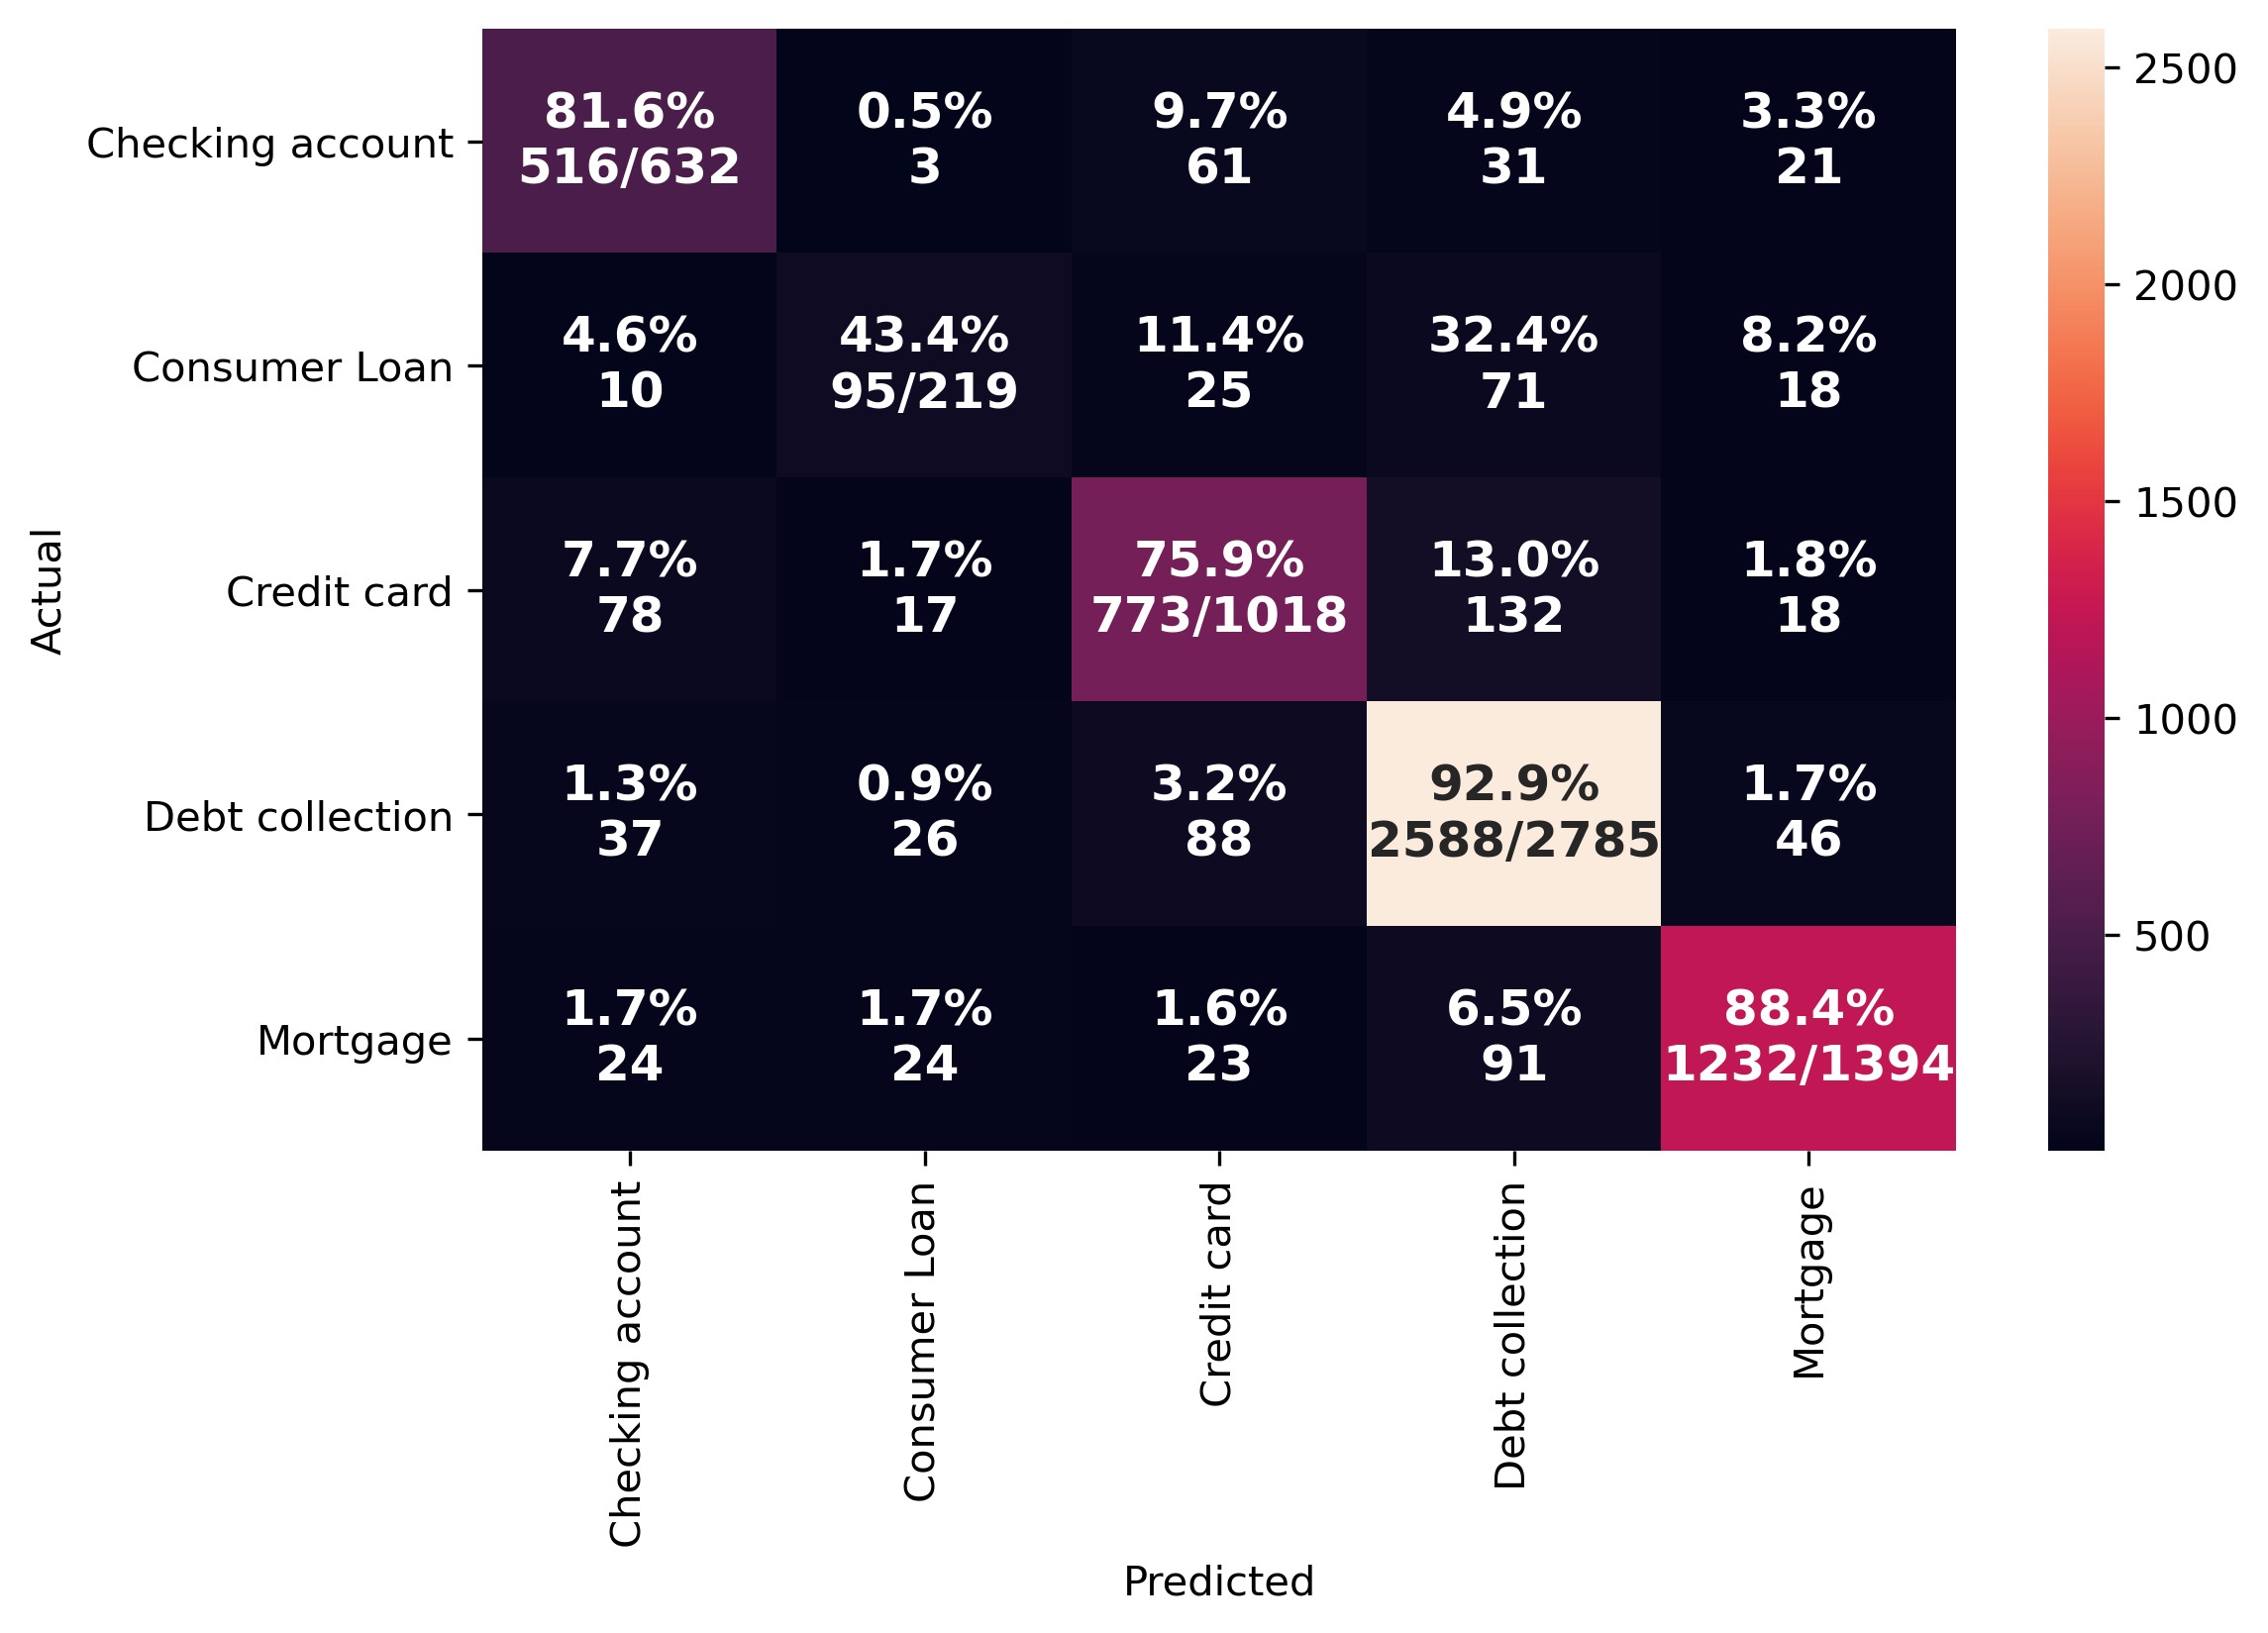

In [19]:
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(linewidth=1, figsize=(8, 5), dpi = 300)
    sns.heatmap(cm, annot=annot, fmt='',annot_kws={'size': 12, 'weight' : 'bold'}, ax=ax)
    #plt.savefig(filename)
    plt.savefig('bank_heat2.png', figsize = (8,5), dpi = 300, bbox_inches = 'tight');
    plt.show()

cm_analysis(y_test, y_pred, log_clf.classes_, ymap=None, figsize=(9,7))

## N-gram Extraction

In [20]:
#Vectorizer for extracting N-grams
tfidf= TfidfVectorizer(sublinear_tf=True, 
                       min_df=5, 
                       norm='l2', 
                       encoding='latin-1', 
                       ngram_range=(1, 3), 
                       stop_words='english',
                       lowercase=True,       
                       token_pattern=r'\b\w+\b',       
                       analyzer='word', 
                      )
features = tfidf.fit_transform(X_train) #CORRECT TRANSFORM
labels = y_train #CORRECT LABEL
X_train.shape[0], labels.shape[0] #DIMENSION CHECK

(14109, 14109)

In [21]:
from sklearn.feature_selection import chi2
import numpy as np
N = 3
for product_group, category_id in sorted(id_to_category.items()):
    features_chi2 = chi2(features,labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
    print("# '{}':".format(category_id))
    print(" . Most correlated unigrams:\n     . {}".format('\n     . '.join(unigrams[-N:])))
    print(" . Most correlated bigrams:\n     . {}".format('\n     . '.join(bigrams[-N:])))
    print(" . Most correlated trigrams:\n     . {}".format('\n     . '.join(trigrams[-N:])))

# 'Checking account':
 . Most correlated unigrams:
     . bank
     . checking
     . overdraft
 . Most correlated bigrams:
     . savings account
     . debit card
     . checking account
 . Most correlated trigrams:
     . 00 checking account
     . account bank america
     . checking savings account
# 'Consumer Loan':
 . Most correlated unigrams:
     . dealership
     . car
     . vehicle
 . Most correlated bigrams:
     . main financial
     . vehicle loan
     . auto loan
 . Most correlated trigrams:
     . fargo dealer services
     . capital auto finance
     . big picture loans
# 'Credit card':
 . Most correlated unigrams:
     . limit
     . cards
     . card
 . Most correlated bigrams:
     . credit limit
     . american express
     . credit card
 . Most correlated trigrams:
     . 00 annual fee
     . credit card account
     . credit card company
# 'Debt collection':
 . Most correlated unigrams:
     . mortgage
     . collection
     . debt
 . Most correlated bigrams:
  